# AAI 501 Final Team Project

**Authors:** Zach Artman, Jim McCarthy, Anand Fernandes

**Date:** 07/25/2024 

**Project Goal**: To be determined.

In [1]:
# Necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('./HR_comma_sep.csv')
df.head()

df['salary'] = df['salary'].map({'low': 0, 'medium': 1, 'high': 2})
df['Department'] = df['Department'].map({'sales': 0, 'accounting': 1, 'hr': 2, 'technical': 3, 'support': 4, 'management': 5, 'IT': 6, 'RandD': 7, 'product_mng': 8, 'marketing': 9})

# renaming typo
df.rename(columns={'average_montly_hours': 'average_monthly_hours'}, inplace=True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0


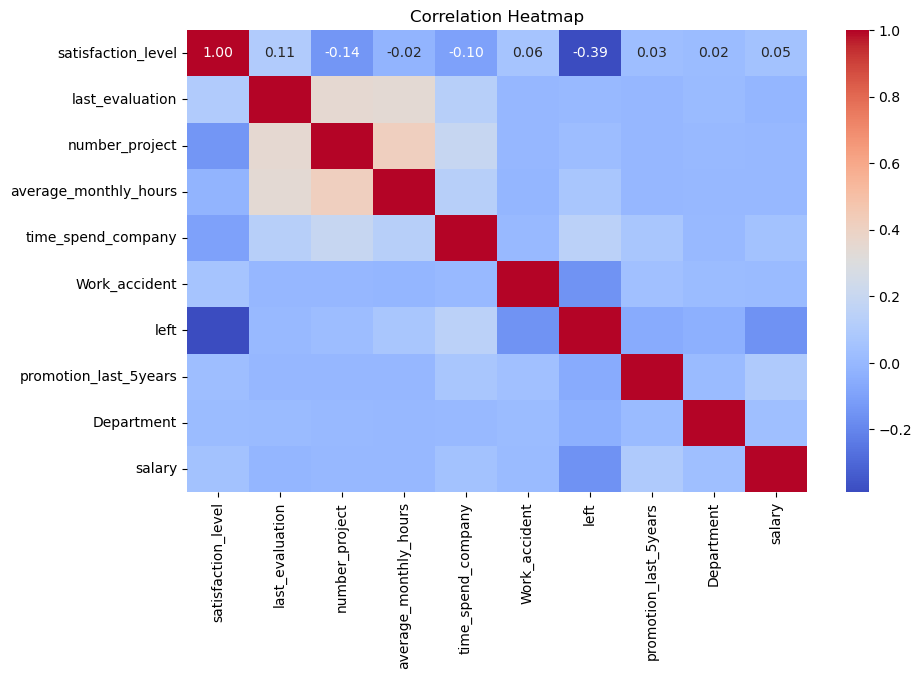

In [3]:
# Correlation heatmap to see relationships between numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

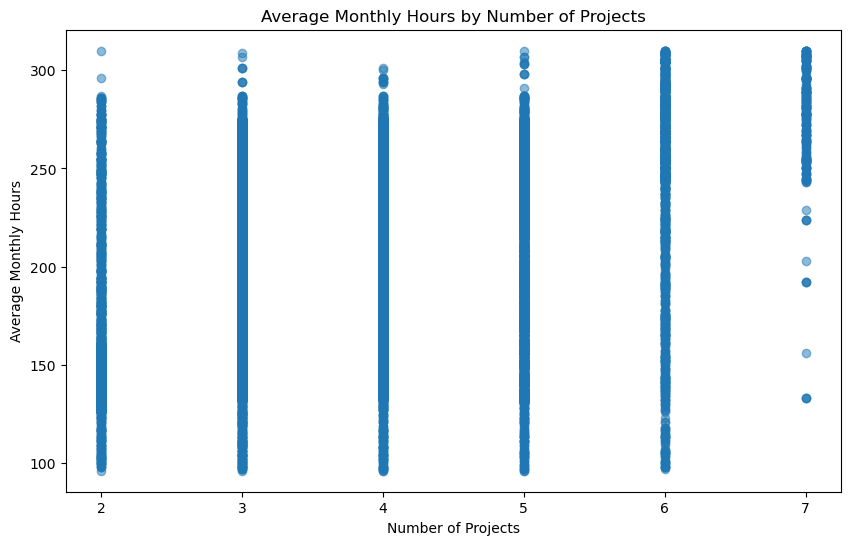

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(df['number_project'], df['average_monthly_hours'], alpha=0.5)
plt.xlabel('Number of Projects')
plt.ylabel('Average Monthly Hours')
plt.title('Average Monthly Hours by Number of Projects')
plt.show()

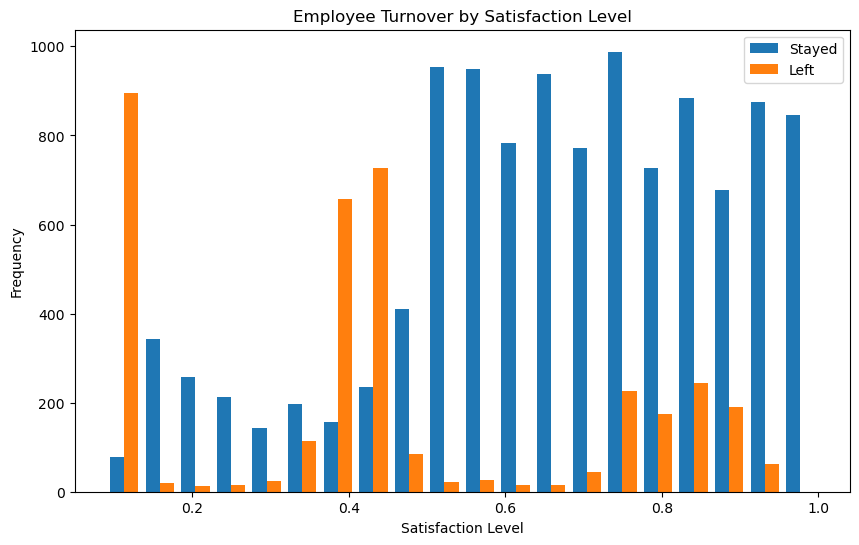

In [5]:
plt.figure(figsize=(10, 6))
plt.hist([df[df['left'] == 0]['satisfaction_level'], df[df['left'] == 1]['satisfaction_level']], 
         bins=20, label=['Stayed', 'Left'])
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.title('Employee Turnover by Satisfaction Level')
plt.legend()
plt.show()

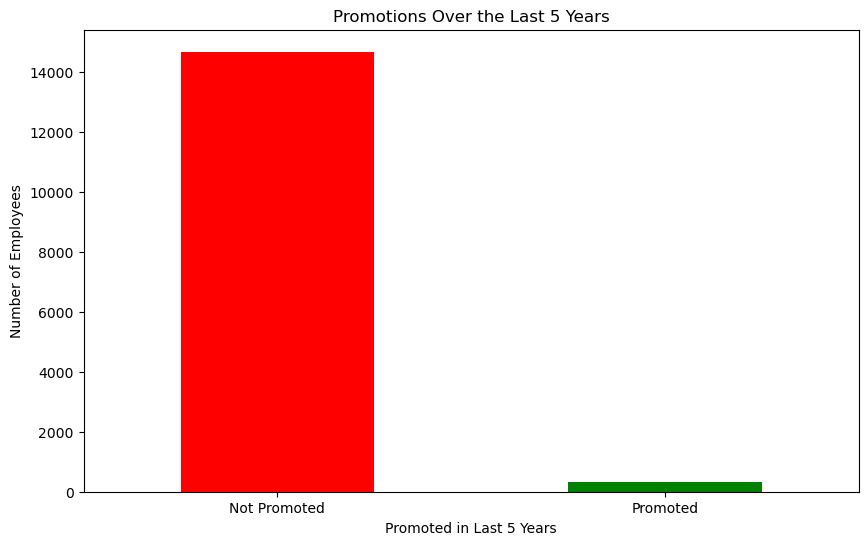

0.02173024523160763

In [6]:
plt.figure(figsize=(10, 6))
promotion_counts = df['promotion_last_5years'].value_counts()
promotion_counts.plot(kind='bar', color=['red', 'green'])
plt.xlabel('Promoted in Last 5 Years')
plt.ylabel('Number of Employees')
plt.title('Promotions Over the Last 5 Years')
plt.xticks(ticks=[0, 1], labels=['Not Promoted', 'Promoted'], rotation=0)
plt.show()

overall_percentage_promoted = promotion_counts[1] / promotion_counts[0]
overall_percentage_promoted

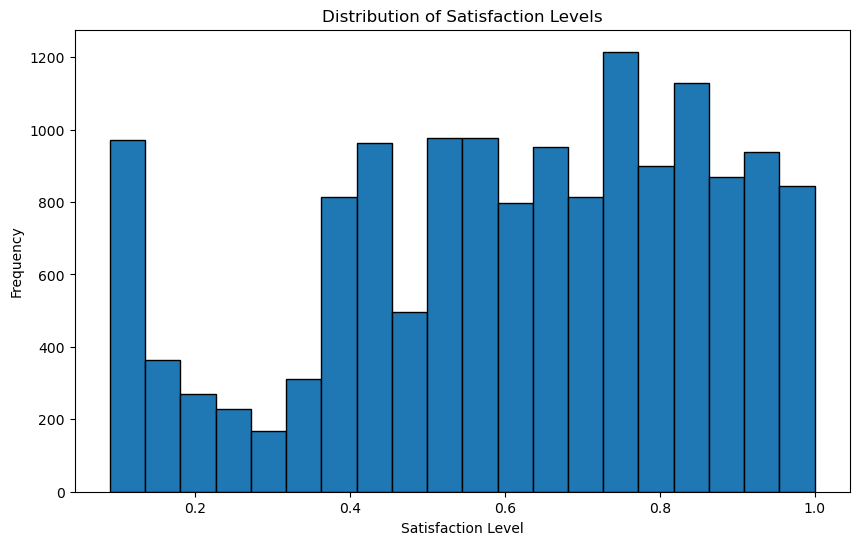

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(df['satisfaction_level'], bins=20, edgecolor='black')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.title('Distribution of Satisfaction Levels')
plt.show()

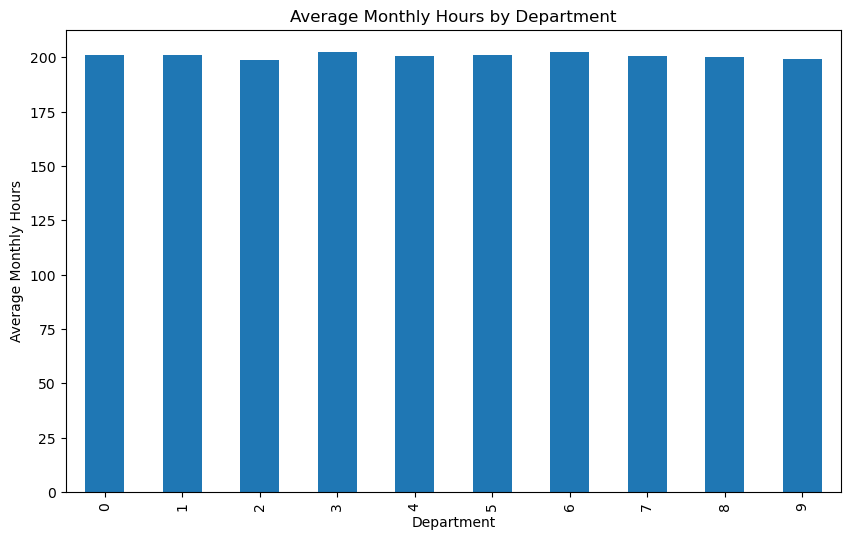

In [8]:
plt.figure(figsize=(10, 6))
df.groupby('Department')['average_monthly_hours'].mean().plot(kind='bar')
plt.xlabel('Department')
plt.ylabel('Average Monthly Hours')
plt.title('Average Monthly Hours by Department')
plt.show()

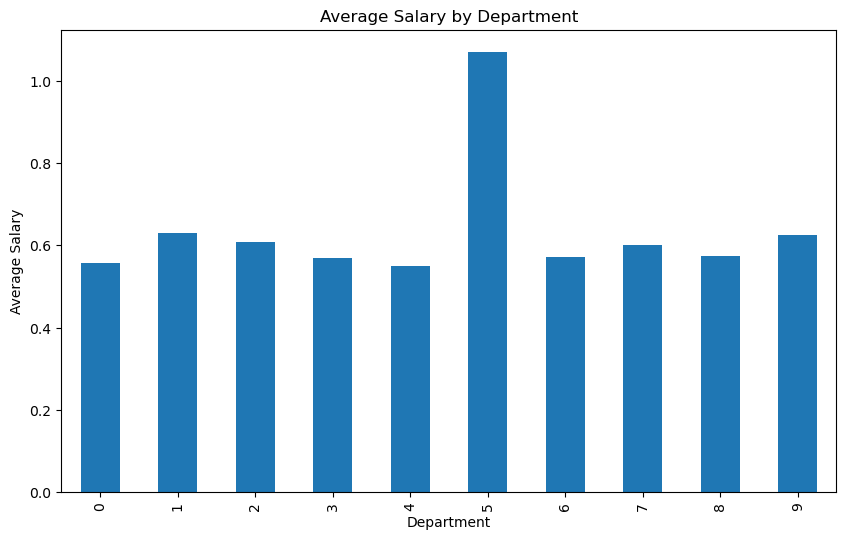

In [9]:
plt.figure(figsize=(10, 6))
df.groupby('Department')['salary'].mean().plot(kind='bar')
plt.xlabel('Department')
plt.ylabel('Average Salary')
plt.title('Average Salary by Department')
plt.show()

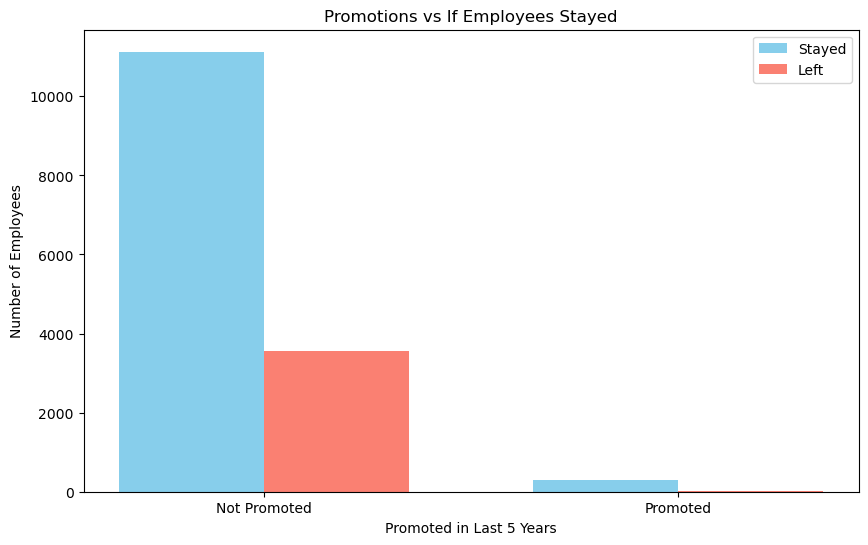

In [10]:
plt.figure(figsize=(10, 6))
promotion_stayed = df[df['left'] == 0]['promotion_last_5years'].value_counts()
promotion_left = df[df['left'] == 1]['promotion_last_5years'].value_counts()

bar_width = 0.35
index = [0, 1]

plt.bar(index, promotion_stayed, bar_width, label='Stayed', color='skyblue')
plt.bar([i + bar_width for i in index], promotion_left, bar_width, label='Left', color='salmon')

plt.xlabel('Promoted in Last 5 Years')
plt.ylabel('Number of Employees')
plt.title('Promotions vs If Employees Stayed')
plt.xticks([i + bar_width / 2 for i in index], ['Not Promoted', 'Promoted'])
plt.legend()
plt.show()


`Main takeaways from graphs: `
- Each department has pretty much the same amount of monthly hours
- The majority of satisfaction levels are greater than half, but there is a big spike at 0.1
- Only an average of 2% of people were promoted in the last 5 years (Seems weird, we should look more into this)
- Big relation between satisfaction level and if someone left the company or stayed
- Average monthly hours and number of projects has some correlation
- Management has the highest salary (Interesting)

`Possible things to analyze:`
- Predict which employees are going to get promoted
- Predict salary of employee
- Come up with some strategies to improve employee retention; look at what makes people stay

### Predicting if someone is going to get a promotion

In [11]:
X = df.drop(columns=['promotion_last_5years'])
y = df['promotion_last_5years']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

model = RandomForestClassifier(random_state=1234)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2946
           1       1.00      0.56      0.71        54

    accuracy                           0.99      3000
   macro avg       1.00      0.78      0.86      3000
weighted avg       0.99      0.99      0.99      3000

Confusion Matrix:
 [[2946    0]
 [  24   30]]


Confusion matrix shows us that there are 2945 true positives, 1 false positive, 24 false negatives, and 30 true negatives.

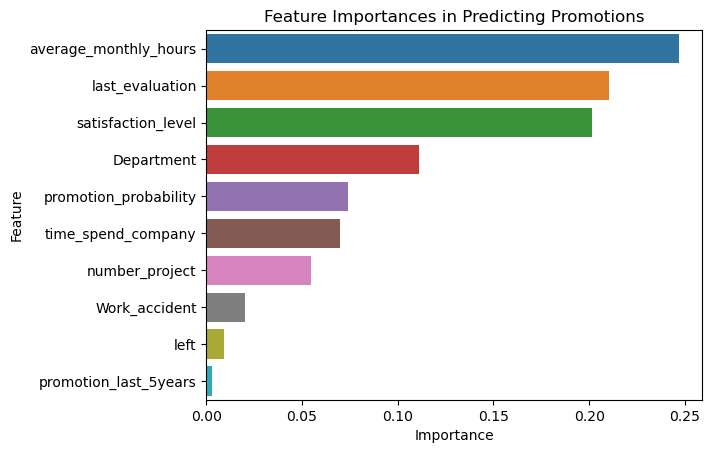

In [25]:
importances = model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances in Predicting Promotions')
plt.show()

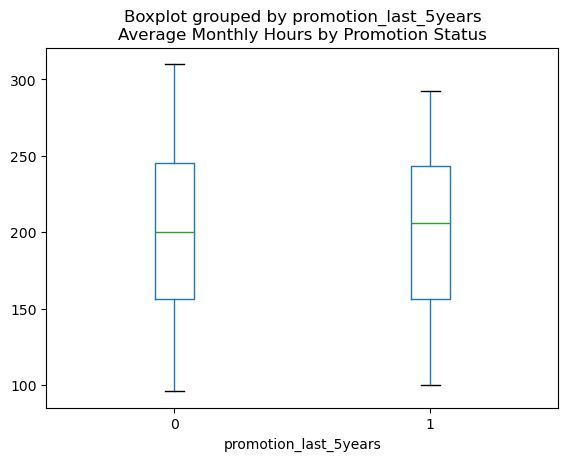

In [13]:
df.boxplot(column='average_monthly_hours', by='promotion_last_5years', grid=False)
plt.title('Average Monthly Hours by Promotion Status')
plt.show()

`Interpretation`: When looking at the results from thsi model, we see that the precision for predicting promotions is perfect at 1.00, so all predicted promotions were correct. However, the recall for promotions is lower at 0.56, indicating that the model missed more than half of the actual promotions. In other words, if the model predicts that someone will get a promotion, they almost certainly will. But the model often fails to identify all employees who will get promoted, so it may incorrectly predict that some individuals will not get a promotion even though they will.

In [14]:
promotion_probabilities = model.predict_proba(X)[:, 1]
df['promotion_probability'] = promotion_probabilities

not_promoted_employees = df[df['promotion_last_5years'] == 0]

# 30% probability of promotion
threshold = 0.3
likely_to_be_promoted = not_promoted_employees[not_promoted_employees['promotion_probability'] > threshold]

employee_ids_likely_to_be_promoted = likely_to_be_promoted.index
print("Employees likely to be promoted:", employee_ids_likely_to_be_promoted)

Employees likely to be promoted: Index([1592, 2595, 3741, 6968, 7252, 8578, 11426, 11631, 11905, 13637, 13842,
       14116],
      dtype='int64')


### Predicting if someone is going to have a work accident

In [15]:
X = df.drop(columns=['Work_accident'])
y = df['Work_accident']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

model = RandomForestClassifier(random_state=1234)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      2586
           1       0.84      0.31      0.45       414

    accuracy                           0.90      3000
   macro avg       0.87      0.65      0.70      3000
weighted avg       0.89      0.90      0.87      3000

Confusion Matrix:
 [[2562   24]
 [ 287  127]]


`Interpretation`: When looking at the results from this model, we see that the precision for predicting non-work accidents (Class 0) is high at 0.90, meaning most predictions of no accident were correct. The recall for Class 0 is even higher at 0.97, indicating the model rarely misses actual cases of no accident. However, the precision for predicting work accidents (Class 1) is lower at 0.67, meaning that when the model predicts an accident, it's correct about two-thirds of the time. The recall for Class 1 is much lower at 0.34, showing that the model misses a significant number of actual work accidents. Overall, the model is more accurate in predicting non-work accidents than work accidents, and it tends to underpredict work accidents. It seems like it is hard to predict work accidents given how few there are.

In [26]:
from sklearn.svm import SVC

X = df.drop(columns=['Work_accident'])
y = df['Work_accident']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

model = SVC(class_weight='balanced', random_state=1234)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.30      0.45      2586
           1       0.15      0.76      0.25       414

    accuracy                           0.37      3000
   macro avg       0.52      0.53      0.35      3000
weighted avg       0.79      0.37      0.42      3000

Confusion Matrix:
 [[ 783 1803]
 [  99  315]]


`Interpretation`: The RandomForestClassifier performed well in identifying non-accidents (class 0) with high precision and recall but struggled to correctly identify actual accidents (class 1), leading to a low recall for accidents. On the other hand, the SVC model flipped this and had significantly lower precision and recall for non-accidents, while it improved the recall for accidents, identifying more actual accident cases but with many false positives. This shows that RandomForest is biased towards predicting non-accidents, while SVC, although improving accident detection, sacrifices accuracy in predicting non-accidents.

In [28]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

stacking_model = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(random_state=1234)),
        ('svc', SVC(probability=True, random_state=1234))
    ],
    final_estimator=LogisticRegression()
)

stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      2586
           1       0.81      0.33      0.46       414

    accuracy                           0.90      3000
   macro avg       0.85      0.66      0.70      3000
weighted avg       0.89      0.90      0.88      3000

Confusion Matrix:
 [[2554   32]
 [ 279  135]]


`Interpretation`: I combined the RandomForest and SVC models because RandomForest was good at identifying non-accidents, while SVC was better at detecting actual accidents, even though it had many false positives. By stacking these models, I hoped to balance their strengths and create a model that is equally good at both. The results show that the stacking model kept the high accuracy in predicting non-accidents, similar to the RandomForest, while slightly improving the recall for accidents compared to the RandomForest alone. This means that the stacking model is a bit better at catching actual accidents without sacrificing much accuracy in other areas.

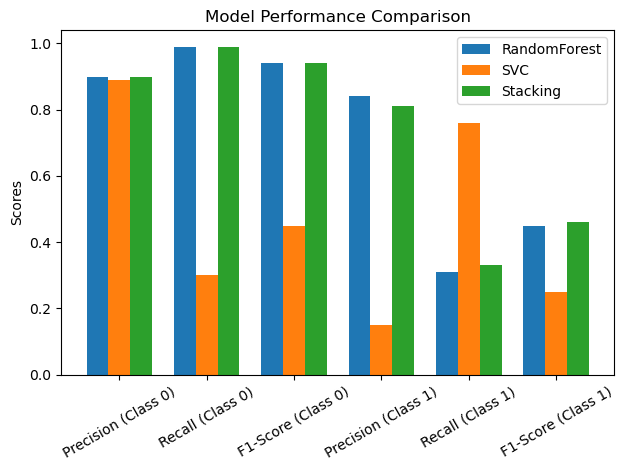

In [40]:
labels = ['Precision (Class 0)', 'Recall (Class 0)', 'F1-Score (Class 0)', 
          'Precision (Class 1)', 'Recall (Class 1)', 'F1-Score (Class 1)']

rf_metrics = [0.90, 0.99, 0.94, 0.84, 0.31, 0.45]
svc_metrics = [0.89, 0.30, 0.45, 0.15, 0.76, 0.25]
stacking_metrics = [0.90, 0.99, 0.94, 0.81, 0.33, 0.46]

x = np.arange(len(labels)) 
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, rf_metrics, width, label='RandomForest')
rects2 = ax.bar(x, svc_metrics, width, label='SVC')
rects3 = ax.bar(x + width, stacking_metrics, width, label='Stacking')

ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=30)
ax.legend()

fig.tight_layout()

plt.show()

### Predicting Employee Turnover

In [17]:
X = df.drop(columns=['left'])
y = df['left']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=1234)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

print(classification_report_result)
print(confusion_matrix_result)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2265
           1       1.00      0.96      0.98       735

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000

[[2264    1]
 [  26  709]]


`Interpretation`: The model performs very well, with high precision and recall for both classes. The recall for predicting those who left (Class 1) is slightly lower, meaning the model misses a small number of actual leavers.

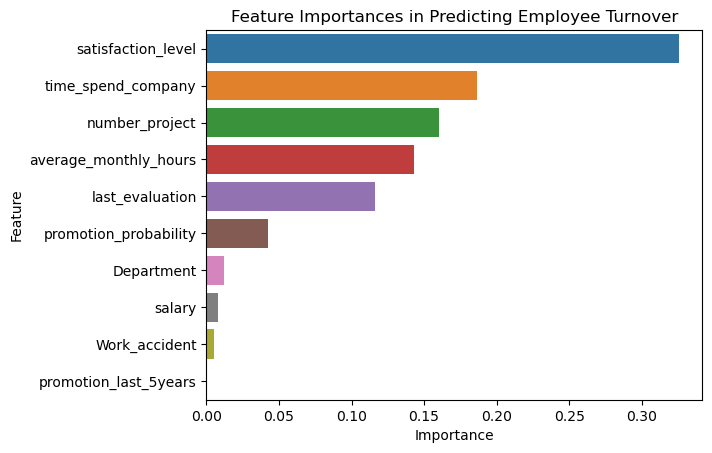

In [19]:
importances = model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances in Predicting Employee Turnover')
plt.show()

### Predicting Salary

In [21]:
X = df.drop(columns=['salary'])
y = df['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

model = RandomForestClassifier(random_state=1234)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

classification_report_result_salary = classification_report(y_test, y_pred)
confusion_matrix_result_salary = confusion_matrix(y_test, y_pred)

print(classification_report_result_salary)
print(confusion_matrix_result_salary)


              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1471
           1       0.68      0.75      0.71      1308
           2       0.74      0.38      0.50       221

    accuracy                           0.72      3000
   macro avg       0.73      0.63      0.66      3000
weighted avg       0.73      0.72      0.72      3000

[[1103  360    8]
 [ 302  985   21]
 [  35  103   83]]


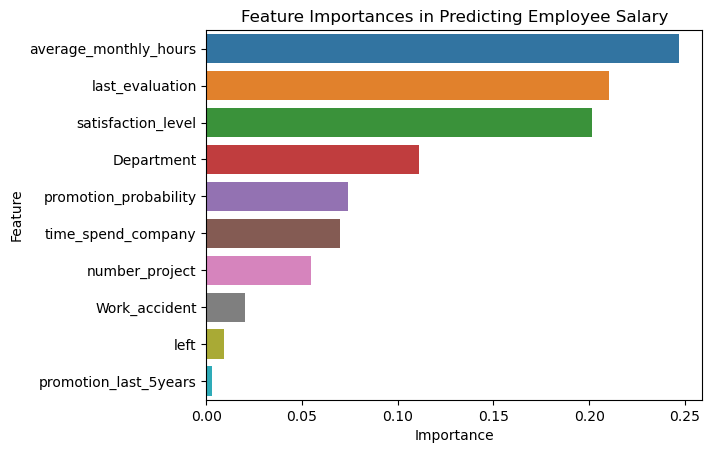

In [23]:
importances = model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances in Predicting Employee Salary')
plt.show()

`Interpretation`: It performs reasonably well in predicting low salaries (class 0), with a precision of 0.77 and recall of 0.75, meaning it correctly identifies most employees with low salaries while maintaining relatively few false positives. For medium salaries (class 1), the precision is slightly lower at 0.68, but the recall is the same at 0.75, indicating that while the model captures most employees with medium salaries, it has a higher rate of false positives, incorrectly predicting medium salary for some employees. However, the model struggles significantly with predicting high salaries (class 2), where the recall drops to 0.38, meaning it misses a large proportion of actual high-salary employees, despite having a decent precision of 0.74. While the model can often correctly identify high salaries when it predicts them, it oftentimes fails to recognize many employees who actually have high salaries. This definitely indicates bias towards the majority salary levels in the dataset.

### JIM